# Missing Values Featuring Engineering (DAY-1)

# Data that will be missing---?




# What are different types of missing data?

1. ##### Missing completely at Random, (MCAR)

A variable is missing completely at random (MCAR) if the probability of being missing is same for all the observation. when data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing eithin the datasets. In otheer words those missing data points are a random subset of the data. There is nothing systematic going on that make some data more likely to be missing than other.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


2. ##### Missing data not at random(MNAR): Sysematic missing value
There is absolutely no relationship between the data missing and any other values, observed or missing within the datasets.

In [9]:
import numpy as np
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)


##find the percentage of null values
df['Cabin_null'].mean() 

0.7710437710437711

In [11]:
df['Cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_null, Length: 891, dtype: int64

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [12]:
# if people survive than value is 1 and if not ssurvive value is 0 in cabin_null columns
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

3. ##### Missing at random(MAR):

Man --- Who is hide their salary

Women --- hide their age

means missing at random those values which are not given by the person

#### All the techniques of handling the missing values

1. Mean/Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution Imputation
5. Arbitrary Imputation
6. Frequent categories Imputation

#### Mean/Mode/Median impuutation
when should we apply this ----
Mean/Median imputation has the assumption that the data are missing completely at random(MCAR). 
we solve this by replacing thr NAN with most frequent Occurance oh the variable

In [15]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
# check the percentage of missing value using mean
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [20]:
def impute_nan(df, variable, median):
    df[variable+'_median']=df[variable].fillna(median)

In [29]:
median = df.Age.median()
median

28.0

In [30]:
impute_nan(df, 'Age', median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [24]:
# check the standard deviation of age and age_median columns
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

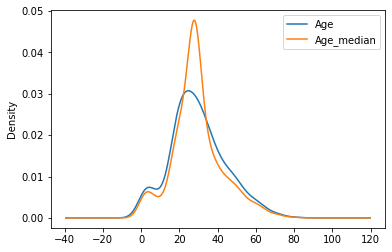

In [26]:
# kde = kernal density estimators
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_median'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages and Disadvantages of mean/median imputation

#### Advantages:-

1. EAsy to implement(Robust to  outliers)
2. Faster way to obtain the complete datasets

#### Disadvantages:-

1. Change or distortion in the original variance
2. Impacts corelation

# SECOND DAY FEATURING ENGINEERING-MISSING Values

#### Random Sample Imputation 

Aim: Random Sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used?

It assumes that the data are missing completely at random(MCAR) 

In [5]:
import pandas as pd
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df.isnull().mean() # get the % of null values

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [12]:
df['Age'].isnull().sum()

177

In [17]:
# get the random nan values from column  random_state is used for not changing the result after every time 
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [35]:
# create a function to replace nan vaalues with  random values

def impute_nan1(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill NA
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the datasets
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [36]:
median=df.Age.median()

In [37]:
median

28.0

In [38]:
impute_nan1(df,"Age",median)

In [39]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

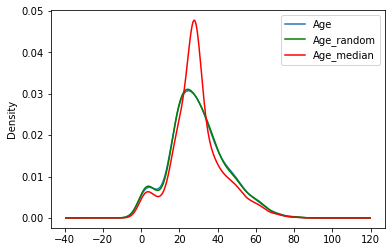

In [43]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_random'].plot(kind='kde', ax=ax, color='green')
df['Age_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##### checking with mean and see the changes in graph

In [44]:
median=df.Age.mean()
median

29.69911764705882

In [45]:
impute_nan1(df,"Age",median)

In [46]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


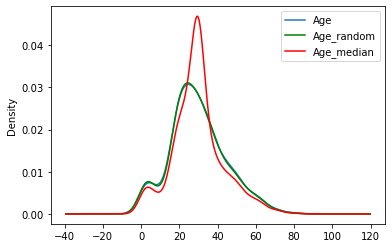

In [47]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_random'].plot(kind='kde', ax=ax, color='green')
df['Age_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##### As we see above that median have less distortion as compare to mean. Becaause median remove the outliers from the data

##### Advantages 
1. EAsy to implement
2. There is less distortion in variance


##### Disadvantages

1. In Every situation randomness wont work

##### capturing NAN values with a new feature

It works well if the data is not missing completely at random 

In [50]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [51]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [52]:
import numpy as np
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)

In [56]:
# rplace the nan values with median in age column and 1 value in age_nan coloumn tell that there is a missing value
df.Age.fillna(df.Age.median(),inplace=True)

In [57]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### In this where the value is present the value of age_nan column is zero and where the value is not present the value will be 1


In [58]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


##### Advantages 

1. EAsy to Impliment
2. It capture the importance of missing values

##### Disadvantage

1. creating aditionals features(curse of dimensionality)


##### End of Distribution Imputation

If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.

In [59]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


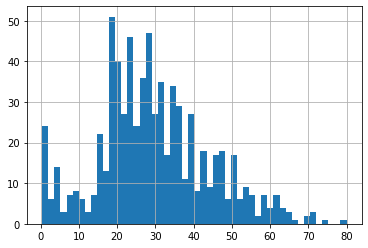

In [62]:
df.Age.hist(bins=50)

##### As we see above the value which is aways from 3rd standaed deviation is  replacd with nan values 

In [68]:
extreme = df.Age.mean()+3*df.Age.std()

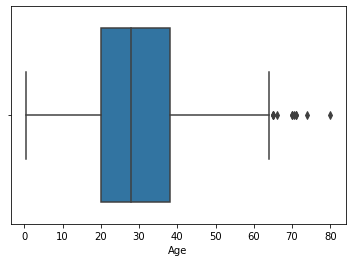

In [69]:
import seaborn as sns
sns.boxplot('Age',data=df)

##### Black dotes are outliers in the datasets

In [72]:
def impute_nan2(df,variable,median,extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [73]:
impute_nan2(df,"Age",df.Age.median(),extreme)

In [74]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


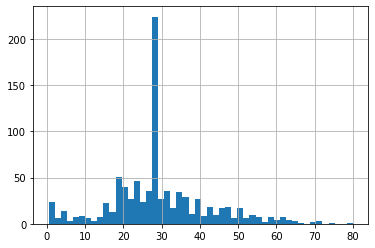

In [77]:
df.Age.hist(bins=50)

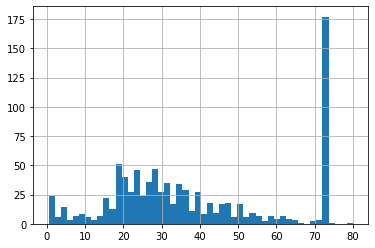

In [79]:
df.Age_end_distribution.hist(bins=50)

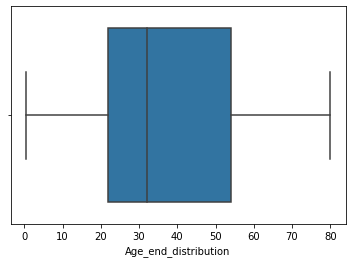

In [80]:
sns.boxplot('Age_end_distribution', data=df)

##### As we see above the outlier are remove from the data 

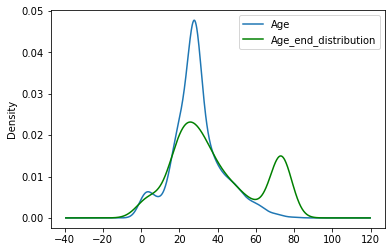

In [82]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_end_distribution'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##### Advantages

1. Easy to Implement
2. Capture the importence of missing values

##### Disadvantages

1. Distorts the original disstribution of the variable
2. If missing is not important, it may mask the predictive power of the original variable by distorting its distribution
3. If the number of NA is buig. It will mask true outliers in the distribution.
4. If the number of NA is small, the replaced NA may be considered an oulier and pre-processed in a subsequent step of  feature engineering

# Feature Engineering- Missing Values Day-3

#### Arbitrary Value Imputation

This techniques was derived from Kaggle competition.
It consist of replacing NAN by an arbitrary value

NOTE:
In this techniques we will take the last oulier from the dataset

In [1]:
import pandas as pd
df= pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
def impute_nan3(df,variable):
    df[variable]=df[variable].fillna(100)

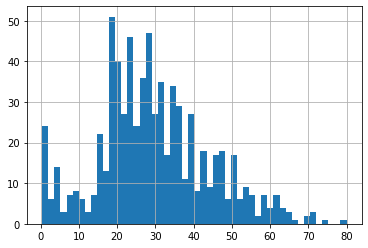

In [3]:
df['Age'].hist(bins=50)

### Arbitrary values

1. It shoul be more frequently present

### Advantages

1. Easy to implement
2. Captures the importance of missingness if there is one


### Disadvantages

1. Disorts the original distribution of the variable
2. If missingness is not important, It may mask the predective power of the original variable by disorting its distribution
3. Hard to decide which value to use